## Real Estate price prediction

## Introduction

Consider a real estate company that wants to predict the prices of different houses of unit area using some indepent features. The company intends to use this data to creat a system that helps predict the price of housing based on the independent variables which includes: housing age, distance to the nearest MRT station, number of convenience stores, latitude and longitude. A simple predictive machine learning algorithm such as linear regression can be used to build the model

## Business Goal

### Essentially, the company wants 
•	To identify the variables affecting house prices per unit area

•	To create a linear model that quantitatively relates house prices with variables such as house age, distance to the nearest MRT station etc

•	To know the accuracy of the model, i.e. how well these variables can predict house prices.

## Business Goal

I am required to build a predictive system using machine learning algorithm that predicts the house price of unit area with the available features. It will be used to understand how exactly the prices vary with the independent variables. The design of the house can be adjusted, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.


## Motivation
The need for a place to stay is going higher and higher as time goes by due to the increasing population.Real estate are built to bring home and comfort to everyone, especially to families. Building real estate alone is not enough. We require some model to be able to predict and determine prices which is comfortable for working families to pay. With linear regression I will be able to predict the price and the dynamic of the market using some key features

In [1]:
# Libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import requests 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

## Reading and understanding the data

Let's start with the following steps:

Importing data using the pandas library

Understanding the structure of the data

In [2]:
#loading data
#my dataset is in a .csv file type. Pandas variable pd is used to access the dataset with read_csv() function.

In [3]:
real_estate = pd.read_csv('datasets_88705_204267_Real estate.csv')

In [4]:
real_estate

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [5]:
#Inspecting the various aspects of my data frame

In [6]:
#the head gives me the first 5 rows of my data set
real_estate.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
real_estate.shape # It gives me the total number of rows and columns my dataset is made up of

(414, 8)

In [8]:
# my data set has 414rows and 8 columns

In [9]:
#Generate various summary statistics, excluding NaN values.

In [10]:
real_estate.describe()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [11]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [12]:
# Check for null values
real_estate.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

My dataset has no null values

There is no need of 'No' column and 'Date' column, hence dropping it.

In [13]:
real_estate.drop(['No'], axis=1, inplace=True)
real_estate.drop(['X1 transaction date'],axis=1, inplace=True)

In [14]:
real_estate.head()

,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,32.0,84.87882,10,24.98298,121.54024,37.9
1,19.5,306.59470,9,24.98034,121.53951,42.2
2,13.3,561.98450,5,24.98746,121.54391,47.3
3,13.3,561.98450,5,24.98746,121.54391,54.8
4,5.0,390.56840,5,24.97937,121.54245,43.1


## Data visualization

This inolves understanding my datasets by placing it in a visual context so that patterns, trends and correlations that might not otherwise be detected can be exposed.

<Figure size 432x864 with 0 Axes>

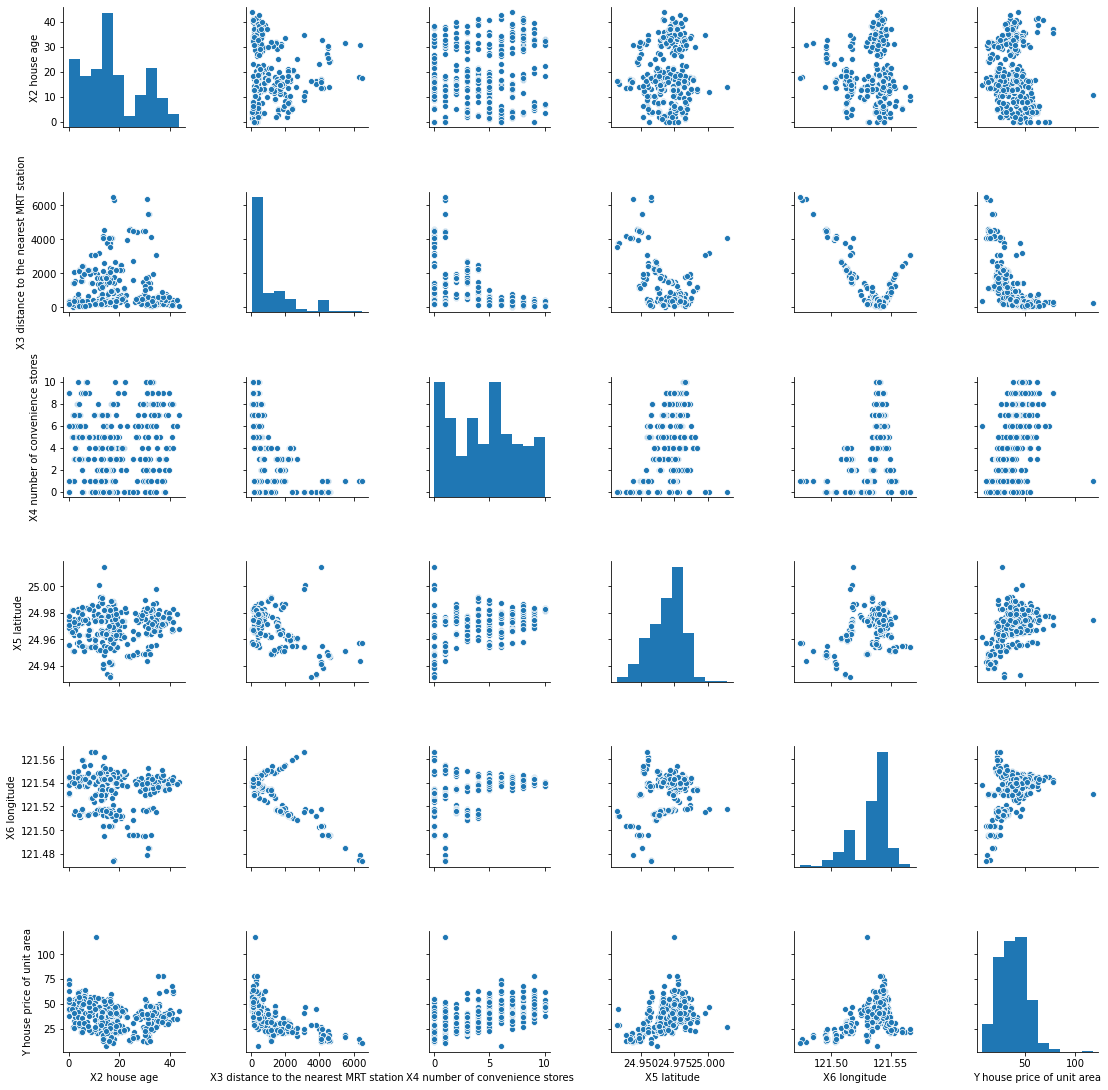

In [15]:
#Visualising all numeric variable
plt.figure(figsize=(6,12))
sns.pairplot(real_estate) # A pairs plot allows us to see both distribution of single variables and relationships between two
plt.show()

The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship (or lack thereof) between two variables

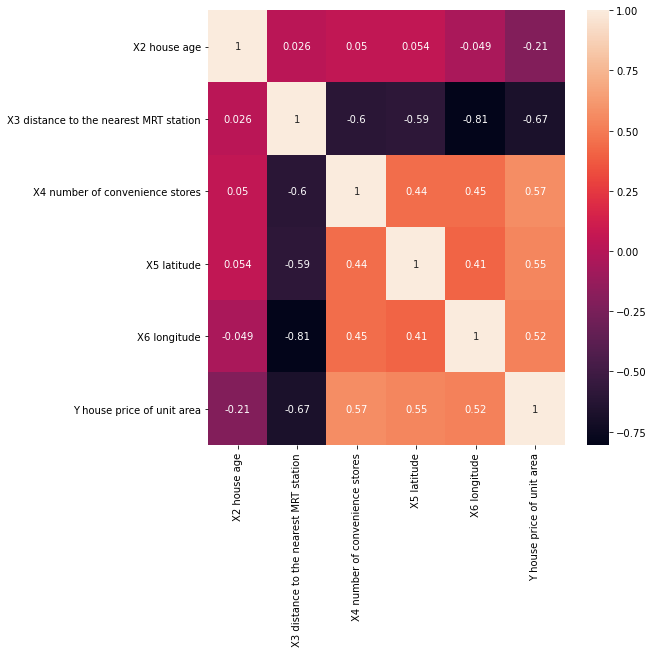

In [16]:
#Find correlation
plt.figure(figsize=(8, 8))
sns.heatmap(real_estate.corr(),annot=True)

### Splitting dataset into train and test data

Train data: 80%,  Test data: 20%


In [17]:
df_train,df_test = train_test_split(real_estate, train_size=0.80, test_size=0.20,random_state=100)
print(df_train.head())
print(df_test.head())

     X2 house age  X3 distance to the nearest MRT station  \
272          13.0                                492.2313   
390          32.8                                377.8302   
69           12.5                                561.9845   
325          36.6                                488.8193   
199          18.2                                451.6419   

     X4 number of convenience stores  X5 latitude  X6 longitude  \
272                                5     24.96515     121.53737   
390                                9     24.97151     121.54350   
69                                 5     24.98746     121.54391   
325                                8     24.97015     121.54494   
199                                8     24.96945     121.54490   

     Y house price of unit area  
272                        40.5  
390                        38.6  
69                         42.0  
325                        38.1  
199                        31.6  
     X2 house age  X3 dist

### Separating the independent variables from the target

In [18]:
y_train = df_train.pop('Y house price of unit area')
X_train = df_train
y_test = df_test.pop('Y house price of unit area')
X_test = df_test

### Model

In [19]:
lm= LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [20]:
lm.coef_ #linear regression coefficients

array([-2.68358370e-01, -4.33678823e-03,  1.07588200e+00,  2.37330180e+02,
       -1.94156722e+01])

## The coefficients of the independent variables are as follows

In [21]:
coeff = pd.DataFrame(lm.coef_, X_train.columns, columns=['coefficient'])
coeff

,coefficient
X2 house age,-0.268358
X3 distance to the nearest MRT station,-0.004337
X4 number of convenience stores,1.075882
X5 latitude,237.330180
X6 longitude,-19.415672


## OLS regression results

The above dataframe represents the cofficients of the independent variables

In [22]:
import statsmodels.api as sm # it is a library that provides classes and functions for the estimation of many different statistical models.
lm1 = sm.OLS(y_train, X_train).fit()
print(lm1.summary())

                                     OLS Regression Results                                    
Dep. Variable:     Y house price of unit area   R-squared (uncentered):                   0.946
Model:                                    OLS   Adj. R-squared (uncentered):              0.945
Method:                         Least Squares   F-statistic:                              1139.
Date:                        Thu, 28 Oct 2021   Prob (F-statistic):                   5.63e-204
Time:                                09:50:17   Log-Likelihood:                         -1208.6
No. Observations:                         331   AIC:                                      2427.
Df Residuals:                             326   BIC:                                      2446.
Df Model:                                   5                                                  
Covariance Type:                    nonrobust                                                  
                                        

The regression output  below shows that the all the independent variables are statistically significant because their p-values equal 0.000. Any P-value  greater than the usual significance level of 0.05 is statistically not significant.

The sign of a regression coefficient tells you whether there is a positive or negative correlation between each independent variable the dependent variable. A positive coefficient indicates that as the value of the independent variable increases, the mean of the dependent variable also tends to increase. A negative coefficient suggests that as the independent variable increases, the dependent variable tends to decrease.

R-squared is always between 0 and 100%. R-squared is always between 0 and 100%.In general, the higher the R-squared, the better the model fits your data

Variance inflation factor (VIF) is a measure of the amount of multicollinearity in a set of multiple regression variables. A large VIF on an independent variable indicates a highly collinear relationship to the other variables that should be considered or adjusted for in the structure of the model and selection of independent variables.

All features p-value is significant and vif is less than 5. Hence no need to remove any feature

## Predictions

In [23]:
y_pred = lm.predict(X_test)

In [24]:
from sklearn import metrics
#R2_score
metrics.r2_score(y_test, y_pred)

0.6710566061561611

Best possible score is 1.0 and it can be negative (because the model can be arbitrarily worse).

my R2 score is above 50% which makes it a good score

In [25]:
df = pd.DataFrame({'Actual':y_test,'Predictions':y_pred})
df['Predictions']= round(df['Predictions'])
df.head()

,Actual,Predictions
121,48.0,42.0
353,31.3,35.0
96,59.5,52.0
43,34.1,42.0
125,48.6,47.0


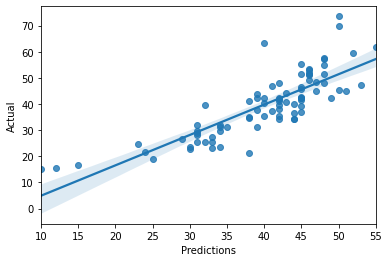

In [26]:
# draw regplot
sns.regplot(x = "Predictions", 
            y = "Actual", 
            data = df)
plt.show()

## Evaluating model performanace

In [27]:
from sklearn import metrics
import numpy as np
#Mean absolute error(MAE)
print('MAE',metrics.mean_absolute_error(y_test,y_pred))
#Mean squared error(MSE)
print('MSE',metrics.mean_squared_error(y_test,y_pred))
#Root mean squared error(RMSE)
print('RMSE',np.sqrt(metrics.mean_squared_error(y_test,y_pred)))

MAE 5.411169613128132
MSE 49.10453709057324
RMSE 7.007462956774958


### Mean Absolute Error: 

Mean Absolute Error is the absolute difference between the actual or true values and the predicted values. The lower the value, the better is the model’s performance.

### Mean Square Error:

Mean Square Error is calculated by taking the average of the square of the difference between the original and predicted values of the data. The lower the value, the better is the model’s performance. 

### Root Mean Square Error: 

Root Mean Square Error is the standard deviation of the errors which occur when a prediction is made on a dataset. This is the same as Mean Squared Error, but the root of the value is considered while determining the accuracy of the model. The lower the value, the better is the model’s performance. 

## Conclusions
My model has adequately addressed the problem statement and help us understand how linear regression can be used to predict prices of housing.



## Limitation and later works
This method fails at finding relationships that are non-linear in nature. So if a variable increases at the rate of the log of another variable, this method will not describe the relationship well


## Later work
I hope to use non linear regressinon in my future work to  model those independent varaiables which are not linearly related to the dependent variable

## References
Gareth James, D. W. (n.d.). An introduction to statistical learning. Retrieved from https://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf

Geron, A. (2019). Hands on machine learning with Scikit-learning, keras, and tensorflow. O'Reilly media, Inc.

Kaggle. (2018). House Price using backward elimination. Retrieved from https://www.kaggle.com/divan0/multiple-linear-regression

